In [6]:
import torchvision
import torch
from torch import Tensor

from src.plots import plot_vae_classifier_training_result, plot_image_label, plot_image_label_two
from src.vae.mnist_vae import VaeAutoencoderClassifier
from src.image_classifier.image_classifier import MNISTClassifier
from src.utils import frechet_inception_distance
from src.sampling import split_dirichlet

ModuleNotFoundError: No module named 'utils'

In [5]:
training_data = torchvision.datasets.MNIST(root='../data/MNIST_train', train=True, download=True, transform=torchvision.transforms.ToTensor())
testing_data = torchvision.datasets.MNIST(root='../data/MNIST_test', train=False, download=True, transform=torchvision.transforms.ToTensor())
print(training_data)
print(testing_data)

input = training_data.data[:60000] / 255.0   # normalizing necessary to make pixels in [0, 1] range for FID
labels = training_data.targets[:60000]

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5396376.20it/s] 


Extracting ../data/MNIST_train\MNIST\raw\train-images-idx3-ubyte.gz to ../data/MNIST_train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 307244.35it/s]


Extracting ../data/MNIST_train\MNIST\raw\train-labels-idx1-ubyte.gz to ../data/MNIST_train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2309366.24it/s]


Extracting ../data/MNIST_train\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data/MNIST_train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2275505.11it/s]


Extracting ../data/MNIST_train\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data/MNIST_train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 7077402.26it/s] 


Extracting ../data/MNIST_test\MNIST\raw\train-images-idx3-ubyte.gz to ../data/MNIST_test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 304011.96it/s]


Extracting ../data/MNIST_test\MNIST\raw\train-labels-idx1-ubyte.gz to ../data/MNIST_test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2101918.32it/s]


Extracting ../data/MNIST_test\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data/MNIST_test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST_test\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data/MNIST_test\MNIST\raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../data/MNIST_train
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ../data/MNIST_test
    Split: Test
    StandardTransform
Transform: ToTensor()


In [6]:
# Train VAE classifier
vae_classifier = VaeAutoencoderClassifier(dim_encoding=2)

# alpha value of 5000 and 20 epochs seems to be the best
# increasing alpha will decrease KL divergence loss but worse generated data
vae_classifier_model, total_losses, classifier_accuracy_li, classifier_loss_li, vae_loss_li, kl_loss_li = vae_classifier.train_model(
    training_data,
    batch_size=100,
    alpha=5000,
    beta=1.0,
    epochs=20
)

# # example of how to later aggregate weights and bias
# vae2 = VaeAutoencoderClassifier(dim_encoding=2)
# avg_parameter = torch.nn.Parameter((vae.encoder.fc1.weight + vae2.encoder.fc1.weight) / 2)

num trainloader batches: 600
Finished epoch:  1
Finished epoch:  2
Finished epoch:  3
Finished epoch:  4
Finished epoch:  5
Finished epoch:  6
Finished epoch:  7
Finished epoch:  8
Finished epoch:  9
Finished epoch:  10
Finished epoch:  11
Finished epoch:  12
Finished epoch:  13
Finished epoch:  14
Finished epoch:  15
Finished epoch:  16
Finished epoch:  17
Finished epoch:  18
Finished epoch:  19
Finished epoch:  20


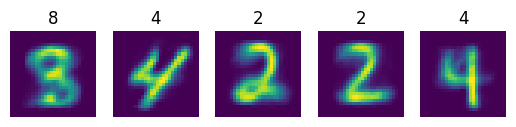

In [7]:
# plot generated data
image_tensor, label_tensor = vae_classifier.generate_data(n_samples=5)
plot_image_label(image_tensor.cpu().detach().numpy(), label_tensor.cpu().detach().numpy())

In [9]:
torch.save(vae_classifier.state_dict(), "C:\\Users\\lyada\\Desktop\\Federated-Learning-PyTorch\\vae_data\\models\\global.pth")

torch.Size([5, 1, 28, 28])


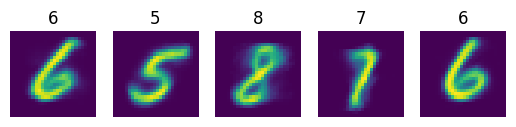

In [12]:
model_clas = VaeAutoencoderClassifier(dim_encoding=2)
model_clas.load_state_dict(torch.load("C:\\Users\\lyada\\Desktop\\Federated-Learning-PyTorch\\vae_data\\models\\global.pth"))
image_tensor, label_tensor = model_clas.generate_data(n_samples=5)
print(image_tensor.shape)
plot_image_label(image_tensor.cpu().detach().numpy(), label_tensor.cpu().detach().numpy())

In [7]:
# move tensors to cpu before converting to np array
np_classifier_accuracy_li = []
np_classifier_loss_li = []
np_vae_loss_li = []
np_kl_loss_li = []

for output in classifier_accuracy_li:
    if isinstance(output, Tensor):
        np_classifier_accuracy_li.append(output.cpu().detach().numpy())

for output in classifier_loss_li:
    if isinstance(output, Tensor):
        np_classifier_loss_li.append(output.cpu().detach().numpy())
        
for output in vae_loss_li:
    if isinstance(output, Tensor):
        np_vae_loss_li.append(output.cpu().detach().numpy())

for output in kl_loss_li:
    if isinstance(output, Tensor):
        np_kl_loss_li.append(output.cpu().detach().numpy())


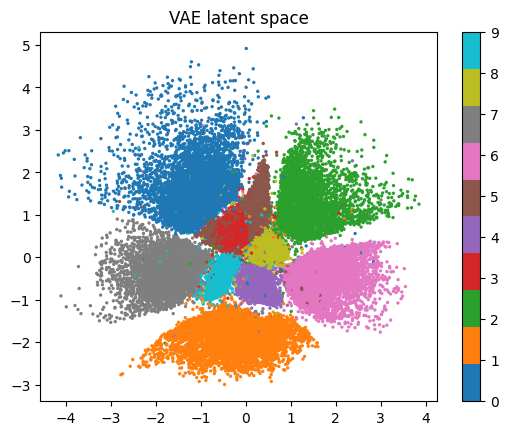

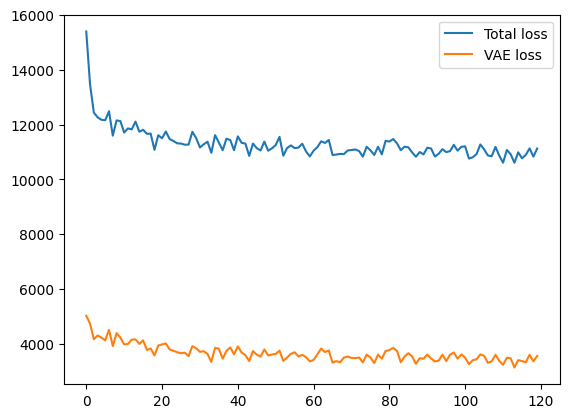

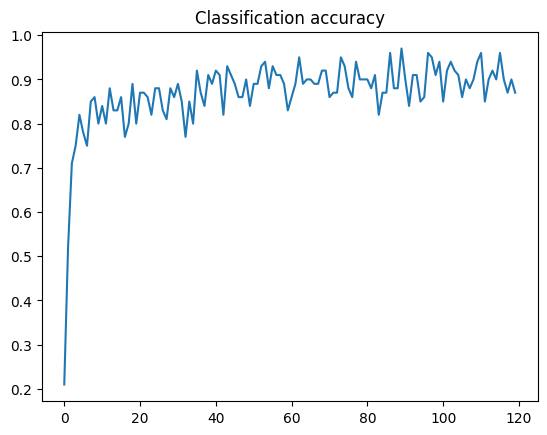

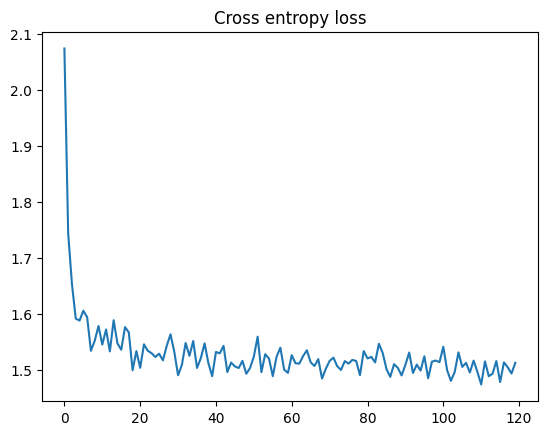

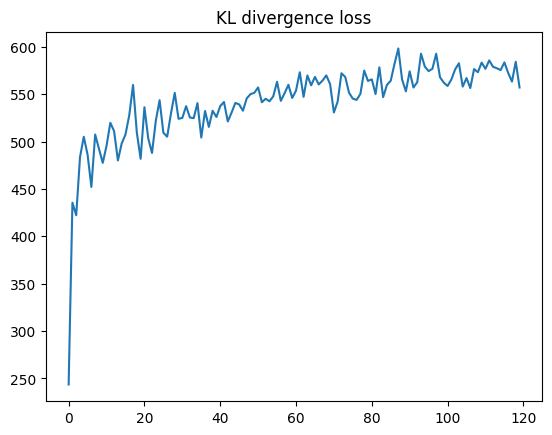

In [8]:
# plot results
plot_vae_classifier_training_result(
    input=input,
    labels=labels,
    vae_model_classifier=vae_classifier_model,
    vae_loss_li=np_vae_loss_li,
    total_losses=total_losses, 
    classifier_accuracy_li=np_classifier_accuracy_li, 
    classifier_loss_li=np_classifier_loss_li,
    kl_loss_li=np_kl_loss_li
)

In [9]:
# train classifier for performance evaluation

classifier = MNISTClassifier(input_size=784, num_classes=10)
classifier.train_model(training_data, batch_size=100, epochs=5)
accuracy = classifier.test_model(testing_data)
print("Test accuracy: ", accuracy)

Epoch done:  1
Epoch done:  2
Epoch done:  3
Epoch done:  4
Epoch done:  5
Test accuracy:  0.9759


In [11]:
# test image classification with gen images
x, y = vae_classifier.generate_data(n_samples=10000)

assert x.shape[0] == y.shape[0]
print("Number of images: ", x.shape[0])

accuracy = classifier.test_model_syn_img_label(x, y)
print("Accuracy: ", accuracy)

Number of images:  10000
Accuracy:  0.9212


(60000, 1, 28, 28)


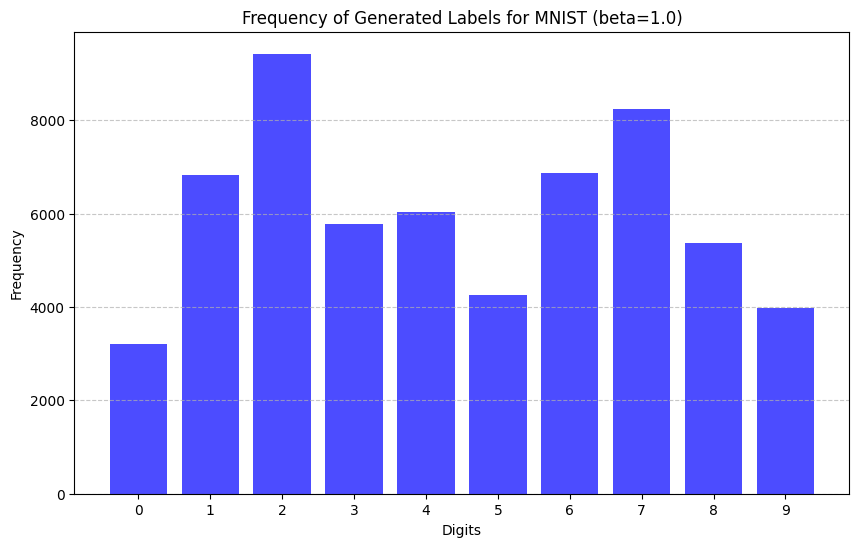

In [7]:
from matplotlib import pyplot as plt
# generate imbalanced data set for comparison of distribution of input vs distribution of generated images
# training_data = torchvision.datasets.MNIST(root='../data/MNIST_train', train=True, download=True, transform=torchvision.transforms.ToTensor())
#
# input = training_data.data[:60000]
# labels = training_data.targets[:60000]
#
# users_data = split_dirichlet(dataset=training_data, num_users=4, is_cfar=False, beta=0.5)
#
import torch
# total_input = []
# total_labels = []
# total_counts = []
# for user_idx in users_data:
#     images = []
#     outputs = []
#     counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#
#     for data_idx in users_data[user_idx]:
#         image = input[int(data_idx)]
#         images.append(image)
#         label = labels[int(data_idx)]
#         outputs.append(label)
#         counts[label] +=1
#     total_input.append(images)
#     total_labels.append(outputs)
#     total_counts.append(counts)
#
# user_idx = 0
# sample_input = total_input[user_idx]
# sample_label = total_labels[user_idx]
#
# # print(sample_input)
# # print(total_labels[user_idx])
#
# input_tensor = torch.stack(sample_input)
# label_tensor = torch.stack(sample_label)
#
# plot_image_label_two(input_tensor.cpu().detach().numpy(), label_tensor.cpu().detach().numpy())
#
# assert input_tensor.shape[0] == label_tensor.shape[0]
#
# training_data.data = input_tensor
# training_data.targets = label_tensor
#
# assert training_data.data.shape == input_tensor.shape
# assert training_data.targets.shape == label_tensor.shape
from src.vae.mnist_vae import VaeAutoencoderClassifier
from src.plots import plot_vae_classifier_training_result, plot_image_label, plot_image_label_two


# Train VAE on imbalanced dataset
vae_imbalanced = VaeAutoencoderClassifier(dim_encoding=2)
checkpoint = torch.load("C:\\Users\\LohithSai\\Desktop\\FederatedImputation\\vae_data\\models\\vae_1.0.pth")
vae_imbalanced.load_state_dict(checkpoint)
# sufficient epoch makes the generated data distribution similar to the given input
# distribution nicely balanced for alpha=1000, beta=1.0, and 20 epochs
# _, _, _, _, _, _ = vae_imbalanced.train_model(
#     training_data,
#     batch_size=50,
#     alpha=1000,
#     beta=1.0,
#     epochs=20
# )

# Assuming vae_imbalanced is already defined and has a generate_data method
gen_image, gen_output = vae_imbalanced.generate_data(n_samples=60000)
gen_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for probabilities in gen_output:
    max_index = torch.argmax(probabilities)
    gen_counts[max_index] += 1

print(gen_image.cpu().detach().numpy().shape)

# Plot the generated digits and their frequencies
digits = range(10)

plt.figure(figsize=(10, 6))
plt.bar(digits, gen_counts, color='blue', alpha=0.7)
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Frequency of Generated Labels for MNIST (beta=1.0)')
plt.xticks(digits)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# plot generated data
# plot_image_label(gen_image.cpu().detach().numpy(), gen_output.cpu().detach().numpy())
#
# print("Input counts: ", total_counts[user_idx])
# print("Generated counts: ", gen_counts)

In [ ]:
# # compute FID score
# syn_input, _ = vae_classifier.generate_data(n_samples=500)
# input = input[:500]
# 
# input_rgb = input.view(-1, 1, 28, 28).repeat(1, 3, 1, 1)
# syn_input_rgb = syn_input.view(-1, 1, 28, 28).repeat(1, 3, 1, 1)
# 
# # compute FID score (worst: 131, best: 85)
# # 0 score only possible if absolutely identical
# fid_score = frechet_inception_distance(input_rgb, syn_input_rgb)
# print("Frechet Inception Distance: ", fid_score)